In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
from tensorflow.keras.datasets import mnist

In [24]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [26]:
x_train.shape

(60000, 28, 28)

In [27]:
y_test.shape

(10000,)

In [28]:
#First image
img1=x_train[0]

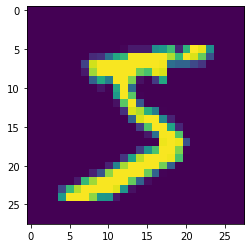

In [31]:
plt.imshow(img1)
#note- mnist consists of greyscale images, since we are using matplotlib to plot it uses the default color

In [32]:
y_train[0]

5

Data Preprocessing

In [33]:
from tensorflow.keras.utils import to_categorical

In [34]:
y_train_cat = to_categorical(y_train,10)
y_test_cat = to_categorical(y_test,10)

In [35]:
y_train_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [36]:
x_train=x_train/255
x_test=x_test/255

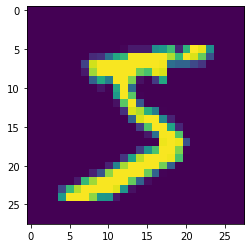

In [37]:
plt.imshow(x_train[0])

In [38]:
x_train.shape

(60000, 28, 28)

In [39]:
x_train=x_train.reshape(60000,28,28,1)

In [40]:
x_test=x_test.reshape(10000,28,28,1)

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [42]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dense(10,activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) 

In [43]:
from tensorflow.keras.callbacks import EarlyStopping

In [44]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [45]:
model.fit(x_train,y_train_cat,epochs=100,validation_data=(x_test,y_test_cat),callbacks=[early_stop])

Epoch 1/100
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1314 - accuracy: 0.9604 - val_loss: 0.0483 - val_accuracy: 0.9830
Epoch 2/100
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0441 - accuracy: 0.9866 - val_loss: 0.0385 - val_accuracy: 0.9875
Epoch 3/100
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0292 - accuracy: 0.9906 - val_loss: 0.0417 - val_accuracy: 0.9871
Epoch 4/100
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0192 - accuracy: 0.9940 - val_loss: 0.0400 - val_accuracy: 0.9874


In [46]:
Trained=pd.DataFrame(model.history.history)

In [47]:
Trained

,loss,accuracy,val_loss,val_accuracy
0,0.131413,0.960367,0.048321,0.9830
1,0.044060,0.986617,0.038544,0.9875
2,0.029164,0.990633,0.041744,0.9871
3,0.019183,0.993967,0.040009,0.9874


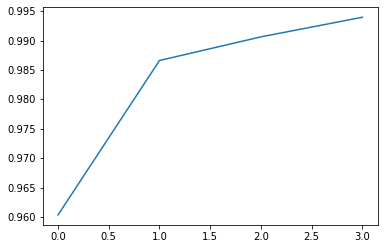

In [48]:
Trained['accuracy'].plot()

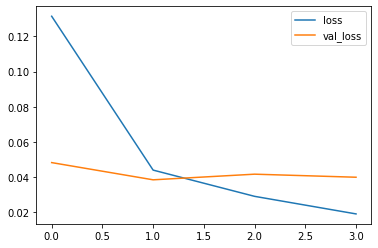

In [49]:
Trained[['loss','val_loss']].plot()

In [50]:
test=x_test[555]
model.predict_classes(test.reshape(1,28,28,1))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([4])

In [51]:
y_test[555]

4

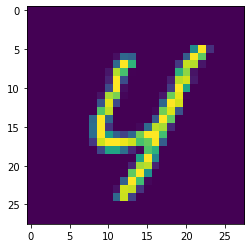

In [52]:
plt.imshow(test.reshape(28,28))

In [53]:
from sklearn.metrics import classification_report

In [54]:
predictions = model.predict_classes(x_test)

In [55]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.99      0.99      0.99       982
           5       1.00      0.97      0.98       892
           6       0.99      0.98      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

